<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/lectures/12_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 12 - Estimation and Confidence Interval

## References 

https://www.britannica.com/science/statistics/Estimation-of-a-population-mean

## Refresher: Properties of normal distribution

- Mean = Median = Mode
- Curve is symmetric about the center, i.e 50% of the values are less than the mean(ùúá) and 50% of values are greater than the mean(ùúá)
- The total area under the curve is 1. This curve is called probability density functoin (PDF)
- 68% of values are within 1 standard deviation of the mean, ùúá¬±ùúé
- 95% of values are within 2 standard deviations of the mean, ùúá¬±2ùúé
- 99.7% of values are within 3 standard deviations of the mean, ùúá¬±3ùúé (This is where the famous six sigma came from)

## Refresher: The Central Limit Theorem 

- If you have a population with mean Œº and standard deviation œÉ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed. 
  - The mean of the sampling distribution is the mean of the population
  - The standard deviation of the sampling distribution is the population standard deviation divided by the root squared of the sample size.

- This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30). 

- If the population is normal, then the theorem holds true even for samples smaller than 30. 

- In fact, this also holds true even if the population is binomial, provided that min(np, n(1-p))> 5, where n is the sample size and p is the probability of success in the population. 

- This means that we can use the normal probability model to quantify uncertainty when making inferences about a population mean based on the sample mean.



## Point and Interval Estimation

The most fundamental point and interval estimation process involves the estimation of a population mean. Suppose it is of interest to estimate the population mean, Œº, for a quantitative variable. Data collected from a simple random sample can be used to compute the sample mean, xÃÑ, where the value of xÃÑ provides a point estimate of Œº.

When the sample mean is used as a point estimate of the population mean, some error can be expected owing to the fact that a sample, or subset of the population, is used to compute the point estimate. The absolute value of the difference between the sample mean, xÃÑ, and the population mean, Œº, written |xÃÑ ‚àí Œº|, is called the sampling error. Interval estimation incorporates a probability statement about the magnitude of the sampling error. The sampling distribution of xÃÑ provides the basis for such a statement.

Statisticians have shown that the mean of the sampling distribution of xÃÑ is equal to the population mean, Œº, and that the standard deviation is given by œÉ/Square root of‚àön, where œÉ is the population standard deviation. The standard deviation of a sampling distribution is called the standard error. For large sample sizes, the central limit theorem indicates that the sampling distribution of xÃÑ can be approximated by a normal probability distribution. As a matter of practice, statisticians usually consider samples of size 30 or more to be large.

## Video to Watch 
https://www.youtube.com/watch?v=_BiVb6neUP0

## Screen Captures from the Above Video

*Figure 1*: Population Parameter vs Sample Statistics

![Point Estimate vs Interval Estimate](https://github.com/wcj365/python-stats-dataviz/blob/master/images/statistical_estimation.png?raw=1)

*Figure 2*. Sampling Distribution of Sample Means

![](https://github.com/wcj365/python-stats-dataviz/blob/master/images/statistical_estimation2.png?raw=1)

*Figure 3*. Interval Estimation

![](https://github.com/wcj365/python-stats-dataviz/blob/master/images/statistical_estimation3.png?raw=1)




In [ ]:
# Import useful libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set global parameter to increase the plot size. Default size is too small
plt.rcParams["figure.figsize"] = (12,12)     

In [ ]:
# load 2017-2018 college scorecard data
# Again, we only load the needed columns

DATA_URL = "https://raw.githubusercontent.com/wcj365/python-stats-dataviz/master/data/MERGED2017_18_PP_FEW_COLUMNS.csv"
col_names = ["STABBR", "INSTNM","CONTROL", "TUITIONFEE_IN"]
df = pd.read_csv(DATA_URL, usecols=col_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7115 non-null   object 
 1   STABBR         7115 non-null   object 
 2   CONTROL        7115 non-null   int64  
 3   TUITIONFEE_IN  4028 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.5+ KB


In [ ]:
df.describe(include="all")

INSTNM STABBR      CONTROL  TUITIONFEE_IN
count                      7115   7115  7115.000000    4028.000000
unique                     6981     59          NaN            NaN
top     Stevens-Henager College     CA          NaN            NaN
freq                          7    716          NaN            NaN
mean                        NaN    NaN     2.129585   15081.399950
std                         NaN    NaN     0.834534   12723.724262
min                         NaN    NaN     1.000000       0.000000
25%                         NaN    NaN     1.000000    5246.250000
50%                         NaN    NaN     2.000000   11296.000000
75%                         NaN    NaN     3.000000   19400.000000
max                         NaN    NaN     3.000000   74514.000000

In [ ]:
# CONTROL represents institution ownership types. 
# So it should be a categorical variable even the value are numbers
# convert it from integer type to string type

df["CONTROL"] = df["CONTROL"].astype(str)
df.describe(include="all")

INSTNM STABBR CONTROL  TUITIONFEE_IN
count                      7115   7115    7115    4028.000000
unique                     6981     59       3            NaN
top     Stevens-Henager College     CA       3            NaN
freq                          7    716    2998            NaN
mean                        NaN    NaN     NaN   15081.399950
std                         NaN    NaN     NaN   12723.724262
min                         NaN    NaN     NaN       0.000000
25%                         NaN    NaN     NaN    5246.250000
50%                         NaN    NaN     NaN   11296.000000
75%                         NaN    NaN     NaN   19400.000000
max                         NaN    NaN     NaN   74514.000000

In [ ]:
# Find out the colleges that have zero tuition

df[df["TUITIONFEE_IN"] == 0]

INSTNM STABBR CONTROL  TUITIONFEE_IN
577     United States Air Force Academy     CO       1            0.0
629   United States Coast Guard Academy     CT       1            0.0
1500        United States Naval Academy     MD       1            0.0
2449     United States Military Academy     NY       1            0.0

In [ ]:
# Drop the colleges with zero tuition

df = df[df["TUITIONFEE_IN"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7111 entries, 0 to 7114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         7111 non-null   object 
 1   STABBR         7111 non-null   object 
 2   CONTROL        7111 non-null   object 
 3   TUITIONFEE_IN  4024 non-null   float64
dtypes: float64(1), object(3)
memory usage: 277.8+ KB


In [ ]:
# Find out how many colleges having missing tuition

df["TUITIONFEE_IN"].isna().sum()

3087

In [ ]:
# Drop these colleges with missing tuition from the dataframe

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         4024 non-null   object 
 1   STABBR         4024 non-null   object 
 2   CONTROL        4024 non-null   object 
 3   TUITIONFEE_IN  4024 non-null   float64
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [ ]:
df.describe(include="all")

INSTNM STABBR CONTROL  TUITIONFEE_IN
count                      4024   4024    4024    4024.000000
unique                     3966     59       3            NaN
top     Stevens-Henager College     CA       1            NaN
freq                          7    316    1692            NaN
mean                        NaN    NaN     NaN   15096.391402
std                         NaN    NaN     NaN   12721.153785
min                         NaN    NaN     NaN     480.000000
25%                         NaN    NaN     NaN    5255.750000
50%                         NaN    NaN     NaN   11315.000000
75%                         NaN    NaN     NaN   19400.000000
max                         NaN    NaN     NaN   74514.000000

Finally, we have a population of 4,024 colleges. 

We will now proceed to take a random sample of colleges and use the sample mean as an estimator for the population mean. Since the sample mean is only the approximation of the population mean, we would like to find out our confidence level and confidence interval of our estimate and the margin of errors.

The formula for calculating standard deviation of a sample is:

 ‚àö(‚àë(xi - x(bar))^2) /n-1)  

The term n-1 is called the degrees of freedom, meaning "number of independent variables - number of parameters estimated".
in this case the mean is being estimated.

The formula for calculating standard deviation of a population is:

‚àö(‚àë((xi - ¬µ )^2) /n) 

**The Standard Error (SE) = Standard Deviation / Square Root of Sample Size**

The SE is the standard deviation of the sampling distribution and is used to measure the sampling error. So the small the sample size, the large the sampling error is.

In [ ]:
# Random sample of colleges
SAMPLE_SIZE = 50   # This variable will be used through out the rest of cells

df_sample = df.sample(SAMPLE_SIZE)
sample_mean = df_sample["TUITIONFEE_IN"].mean()
sample_mean                   

15950.12

In [ ]:
#### Let's calculate the sample standard deviation the hard way

tuition_list = list(df_sample["TUITIONFEE_IN"])
degree_of_freedom = SAMPLE_SIZE - 1
variance = 0
for tuition in tuition_list:
    variance += (tuition - sample_mean)**2
sample_std = math.sqrt(variance/degree_of_freedom)
round(sample_std, 2)

10195.73

In [ ]:
#### Let's calculate the sample standard deviation easy way using Pandas

sample_std = df_sample["TUITIONFEE_IN"].std()
round(sample_std, 2)

10195.73

#### Let's calculate the sample standard deviation easy way using Numpy

Notes:

Delta Degrees of Freedom (DDOF): the divisor used in the calculation is N - ddof, where N represents the number of observations. By default, ddof is zero.

In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables.


In [ ]:
sample_std = np.std(df_sample["TUITIONFEE_IN"], ddof=1)
round(sample_std, 2)

10195.73

### Confidence Intervals 

We will use the following characteristics of a normal distribution:

- 68% of values are within 1 standard deviation of the mean, ùúá¬±ùúé
- 95% of values are within 2 standard deviations of the mean, ùúá¬±2ùúé
- 99.7% of values are within 3 standard deviations of the mean, ùúá¬±3ùúé (This is where the famous 6 sigma came from)

In [ ]:
# let's calculate the standard error first 
# Since we assume we don't know the population standard deviation, we use sample standard deviation as an estimate

std_err = sample_std / math.sqrt(SAMPLE_SIZE)       # standard error
std_err

1441.8936739763653

In [ ]:
# Calculate 68% Confidence Interval (CI) - one standard error from the population mean
# 68% chances the population mean is within the sample_mean (+ or -) the standard error (SE)

LCL_68 = sample_mean -  std_err
UCL_68 = sample_mean +  std_err

print("Lower confidence limit at 68% confidence level = ", round(LCL_68,2))
print("Upper confidence limit at 68% confidence level = ", round(UCL_68,2))

Lower confidence limit at 68% confidence level =  14508.23
Upper confidence limit at 68% confidence level =  17392.01


In [ ]:
# Calculate 95% Confidence Interval (CI) - one standard error from the population mean
# 90% chances the population mean is within the sample_mean + or - 2 * the standard error (SE)

LCL_95 = sample_mean -  2 * std_err
UCL_95 = sample_mean +  2 * std_err
print("Lower confidence limit at 95% confidence level = ", round(LCL_95,2))
print("Upper confidence limit at 95% confidence level = ", round(UCL_95,2))


Lower confidence limit at 95% confidence level =  13066.33
Upper confidence limit at 95% confidence level =  18833.91


In [ ]:
# Calculate 99.7% Confidence Interval (CI) - one standard error from the population mean
# 99.7% chances the population mean is within the sample_mean + or - 3 * the standard error (SE)

LCL_997 = sample_mean -  3 * std_err
UCL_997 = sample_mean +  3 * std_err
print("Lower confidence limit at 99.7% confidence level = ", round(LCL_997,2))
print("Upper confidence limit at 99.7% confidence level = ", round(UCL_997,2))

Lower confidence limit at 99.7% confidence level =  11624.44
Upper confidence limit at 99.7% confidence level =  20275.8


In [ ]:
# Calculate population mean

df["TUITIONFEE_IN"].mean()

15096.391401590457

## Next, let's compare the tuition of different types of institutions using Boxplot

In [ ]:
# Transform the cryptic numbers to explicit lables. 
# Notice here we don't use for loop. Instead, we use "apply" and 
# and pass a function as a parameter. This is called funcitonal programming
# style. 

def get_ownership(control):
    if control == "1":
        return "Public"
    elif control =="2":
        return "Private nonprofit"
    elif control =="3":
        return "Private for-profit"
    else: 
        return np.nan
    
df["CONTROL"] = df["CONTROL"].apply(get_ownership)
df.sample(10)

INSTNM  ... TUITIONFEE_IN
1761                                Hamline University  ...       40332.0
2289                     Hobart William Smith Colleges  ...       53525.0
5415                  Argosy University-Salt Lake City  ...       13438.0
4080                         Bethel Seminary-San Diego  ...           NaN
4420  Central Susquehanna Intermediate Unit LPN Career  ...           NaN
3730                       Cornish College of the Arts  ...       40464.0
6263                  Paul Mitchell the School-Ardmore  ...           NaN
3853               Milwaukee Institute of Art & Design  ...       36230.0
5505                        Woodland Community College  ...        1124.0
1524                      Boston Architectural College  ...       21174.0

[10 rows x 4 columns]

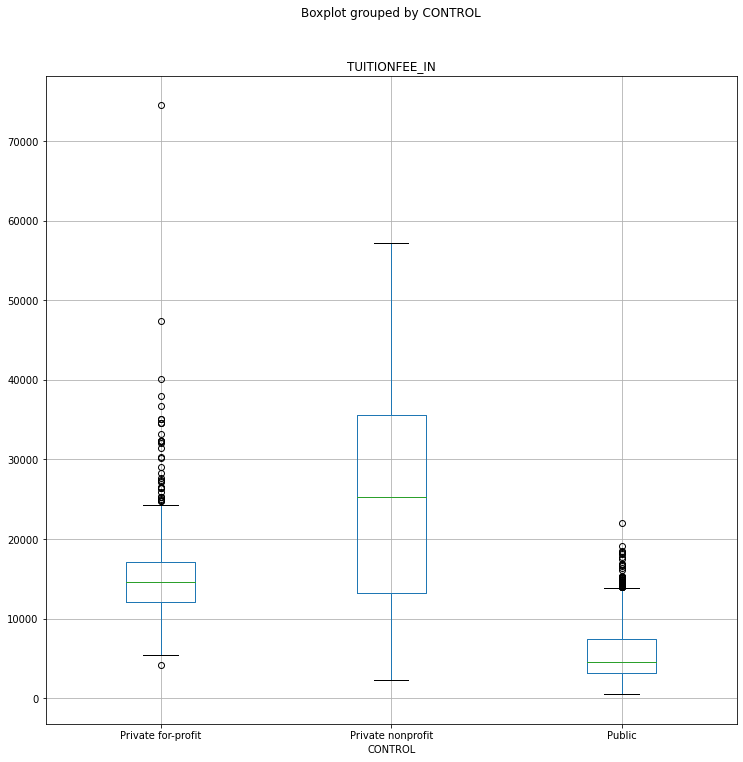

In [ ]:
# Display the boxplot by different ownership types

df.boxplot("TUITIONFEE_IN",by="CONTROL")

**Question: Why pro-profit college charge lower tuition than nonprofit ones?**

### The End 